In [1]:
import os
from scripts.paper_figures.input import Input

import basty.project.experiment_processing as experiment_processing
from scripts.paper_figures.process_results import BehaviorData

from basty.utils import misc

In [2]:
RESULTS_FOLDER = r"Z:\mfk\basty-projects\backup-allnohaltere\results\semisupervised_pair_kNN\predictions.15NN.neighbor_weights-distance.neighbor_weights_norm-log_count.activation-standard.voting-soft.voting_weights-None\exports"

BODY_PART_SETS = {"HaltereSwitch": "prob", "Feeding": "prob"}

CONFIG_PATH = r"Z:\mfk\basty-projects\main_cfg.yaml"

PROJECT_PATH = os.path.dirname(CONFIG_PATH)

TMP_RESULT_FOLDER = os.path.join(PROJECT_PATH,'tmp_results')

project = experiment_processing.Project(CONFIG_PATH)



BODY_PART_SETS = {"ProboscisPumping": "prob", "Feeding": "prob", "HaltereSwitch": "halt",'Grooming':'thor_post'}

In [3]:
io_process = Input(project, RESULTS_FOLDER, TMP_RESULT_FOLDER)

In [4]:
# Get folders for all the data that is located 
#Load all the data
import pickle
import pandas as pd


base_behavior_folder = io_process.get_prediction_result_folder('Idle&Other')

# First collect the base_behavior
base_df = pd.read_pickle(os.path.join(base_behavior_folder,'grouped_dict.pkl'))

BEHAVIORS = ['Grooming','Feeding']
# Then collect other behaviors, we are just going to look at the presence of grooming and feeding 

behavior_bouts = {} 
for behavior in BEHAVIORS:
    behavior_folder = io_process.get_prediction_result_folder(behavior)
    
    behavior_dict = pd.read_pickle(os.path.join(behavior_folder,'grouped_binned.pkl'))
    
    behavior_bouts[behavior] = behavior_dict
    

In [5]:
base_df.columns

Index(['Idle&Other', 'PosturalAdjustment&Moving', 'Idx', 'ExptNames'], dtype='object')

In [6]:
# Change all the rows of the PosturalAdj&Moving in the base_df to 0 if it is not 1
base_df.loc[base_df['PosturalAdjustment&Moving'] > 0.8, 'PosturalAdjustment&Moving'] = 1
base_df.loc[base_df['PosturalAdjustment&Moving'] < 0.8, 'PosturalAdjustment&Moving'] = 0

In [7]:
# Remove all the rows that are 'Fly05252022_SD_5d' in ExptNames
base_df = base_df[~base_df['ExptNames'].str.contains('Fly05252022_SD_5d')]

In [40]:
behavior_bouts['Feeding']['SD_False_Sex_M'].head()

,start_index,stop_index,region,pose.prob_x,pose.prob_y,pose.halt_x,pose.halt_y,pose.thor_post_x,pose.thor_post_y,distance.origin-halt,...,distance.origin-thor_post,distance.head-prob,distance.thor_post-halt,"distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)","distance.avg(origin-joint1,origin-joint2,origin-joint3)",start_index_hr,stop_index_hr,ExptNames,bin,duration
0,75188,75237,Fly05182022_5d,"[770.4898665150007, 769.9183955192566, 769.346...","[567.8098469575247, 567.846261392037, 567.8826...","[593.1958540479342, 592.9961686333021, 593.023...","[542.9028541644415, 542.9149927285811, 542.877...","[602.1838432053725, 601.955640266339, 601.8634...","[506.41955645382404, 506.5728210955858, 506.42...","[804.1298591145305, 803.990761976312, 803.9851...",...,"[786.8202769225514, 786.7443141969304, 786.580...","[81.33436861081738, 81.18454939009972, 81.1980...","[37.57412621653058, 37.430276127024186, 37.506...","[165.46085208361856, 165.63884942692746, 165.7...","[913.3618415895218, 913.6502159846505, 913.821...",0.696185,0.696639,Fly05182022_5d,"(0, 108000]",49
1,105778,105975,Fly05182022_5d,"[219.5636386871338, 219.5162276426951, 219.908...","[576.9387941658497, 575.5082978308201, 573.988...","[395.04756199320155, 395.68132578333217, 396.4...","[559.33012693127, 559.5386565725008, 559.75342...","[390.490317756931, 391.51865877211094, 392.562...","[522.0542220274607, 521.8829642633597, 521.710...","[684.7720548691536, 685.3081203171421, 685.918...",...,"[651.9381097915707, 652.4175722304111, 652.906...","[84.734953842006, 84.50944570614612, 84.454174...","[37.55344939452108, 37.88507568854815, 38.2396...","[177.1071728895769, 177.66209156384582, 178.11...","[727.8636748333614, 727.4615918922864, 727.116...",0.979426,0.981250,Fly05182022_5d,"(0, 108000]",197
2,106216,106819,Fly05182022_5d,"[194.98634068171182, 196.00602636734644, 197.0...","[578.4046346346537, 577.276362935702, 576.1480...","[378.82468932370347, 380.04879657924175, 381.0...","[542.7626068393389, 542.4420383572578, 542.062...","[376.0995745814095, 377.14678964577615, 378.48...","[509.0748559832573, 508.5525019566218, 508.145...","[661.8907709163464, 662.3295650644826, 662.577...",...,"[632.9360939263074, 633.1392802428667, 633.609...","[96.65366364987884, 96.91457125454872, 96.6475...","[33.79779294717474, 34.01356084993037, 34.0120...","[174.9788280622803, 174.54787809122968, 173.56...","[710.6824653434151, 710.4971746997838, 710.447...",0.983481,0.989065,Fly05182022_5d,"(0, 108000]",603
3,116021,116041,Fly05182022_5d,"[634.200839360555, 634.0052926143011, 633.9714...","[632.9311337868372, 632.6318884094557, 632.414...","[496.71446788311005, 496.9275749400258, 497.29...","[592.1891645789146, 592.056389272213, 591.9922...","[480.09515652805567, 480.38929512848455, 480.5...","[557.3583186318477, 556.7758619089922, 556.193...","[772.9251381919687, 772.9604018407574, 773.146...",...,"[735.6219509162424, 735.3728545972739, 735.025...","[77.3067272753899, 77.21593194049805, 76.96031...","[38.59260731415469, 38.96447497595477, 39.5285...","[157.27281854268986, 157.56283468308925, 157.8...","[873.7675967998258, 873.707739387207, 873.6749...",1.074269,1.074454,Fly05182022_5d,"(108000, 216000]",20
4,243836,243925,Fly05182022_5d,"[791.7932098905245, 791.7709177732468, 791.920...","[173.4142768383026, 173.26345495382944, 173.14...","[657.7980393767357, 657.7355409264565, 657.673...","[264.1796010335286, 264.19855030377704, 264.14...","[669.3865223526955, 669.2709876298904, 669.274...","[298.2424656301737, 298.11443081498146, 298.04...","[708.8646712949601, 708.8137384252901, 708.736...",...,"[732.82118188041, 732.6635440249701, 732.63787...","[84.97815017393545, 85.08158389387543, 85.1469...","[35.98015678417042, 35.82392331247461, 35.8274...","[186.94469978867232, 186.93518641170203, 186.9...","[705.8160744260446, 705.760919258324, 705.6496...",2.257741,2.258565,Fly05182022_5d,"(216000, 324000]",89


In [18]:
# Initialize the cumulative dataframe to hold results from all sub-dictionaries
cumulative_df = pd.DataFrame(columns=['Idx', 'ExptNames'])

# Iterate over each key-value pair in the behavior_bouts['Feeding'] dictionary
for key, test_bout in behavior_bouts['Feeding'].items():
    # Initialize lists to hold transformed data for this sub-dictionary
    idx_list = []
    exptnames_list = []
    
    for _, row in test_bout.iterrows():
        start = row['start_index']
        stop = row['stop_index']
        expt_name = row['ExptNames']
        
        # Create a list of indices for this row and append to idx_list
        idx_list.extend(list(range(start, stop + 1)))
        
        # Append the experiment name for each of the indices to exptnames_list
        exptnames_list.extend([expt_name] * (stop - start + 1))
    
    # Create a temporary dataframe for this sub-dictionary
    temp_df = pd.DataFrame({
        'Idx': idx_list,
        'ExptNames': exptnames_list
    })
    
    # Concatenate the temporary dataframe to the cumulative dataframe
    cumulative_df = pd.concat([cumulative_df, temp_df], ignore_index=True)




In [22]:
# Merge the two dataframes on both Idx and ExptNames columns.
# 'left' ensures that all rows from base_df are retained.
merged_df = pd.merge(base_df, cumulative_df, on=['Idx', 'ExptNames'], how='left', indicator=True)

# Set the 'PosturalAdjustment&Moving' value to 1 where the merge indicator is 'both'
# meaning the condition (matching Idx and ExptNames) is satisfied.
merged_df.loc[merged_df['_merge'] == 'both', 'PosturalAdjustment&Moving'] = 1.0

# Drop the unnecessary merge indicator column.
base_df_updated = merged_df.drop(columns=['_merge'])

In [32]:
# Reset the indices of both dataframes without adding the old index as a column
base_df_reset = base_df.reset_index(drop=True)
base_df_updated_reset = base_df_updated.reset_index(drop=True)

# Produce a Boolean Series by directly comparing the two columns
comparison = base_df_reset['PosturalAdjustment&Moving'] == base_df_updated_reset['PosturalAdjustment&Moving']

# Count the number of rows that are identical (True) and different (False)
identical_count = comparison.sum()
different_count = len(base_df_reset) - identical_count


# Display the results
print(f"Number of identical rows: {identical_count}")
print(f"Number of different rows: {different_count}")


In [37]:
behavior_bouts['Feeding']['SD_False_Sex_M'].head()

,start_index,stop_index,region,pose.prob_x,pose.prob_y,pose.halt_x,pose.halt_y,pose.thor_post_x,pose.thor_post_y,distance.origin-halt,...,distance.origin-thor_post,distance.head-prob,distance.thor_post-halt,"distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)","distance.avg(origin-joint1,origin-joint2,origin-joint3)",start_index_hr,stop_index_hr,ExptNames,bin,duration
0,75188,75237,Fly05182022_5d,"[770.4898665150007, 769.9183955192566, 769.346...","[567.8098469575247, 567.846261392037, 567.8826...","[593.1958540479342, 592.9961686333021, 593.023...","[542.9028541644415, 542.9149927285811, 542.877...","[602.1838432053725, 601.955640266339, 601.8634...","[506.41955645382404, 506.5728210955858, 506.42...","[804.1298591145305, 803.990761976312, 803.9851...",...,"[786.8202769225514, 786.7443141969304, 786.580...","[81.33436861081738, 81.18454939009972, 81.1980...","[37.57412621653058, 37.430276127024186, 37.506...","[165.46085208361856, 165.63884942692746, 165.7...","[913.3618415895218, 913.6502159846505, 913.821...",0.696185,0.696639,Fly05182022_5d,"(0, 108000]",49
1,105778,105975,Fly05182022_5d,"[219.5636386871338, 219.5162276426951, 219.908...","[576.9387941658497, 575.5082978308201, 573.988...","[395.04756199320155, 395.68132578333217, 396.4...","[559.33012693127, 559.5386565725008, 559.75342...","[390.490317756931, 391.51865877211094, 392.562...","[522.0542220274607, 521.8829642633597, 521.710...","[684.7720548691536, 685.3081203171421, 685.918...",...,"[651.9381097915707, 652.4175722304111, 652.906...","[84.734953842006, 84.50944570614612, 84.454174...","[37.55344939452108, 37.88507568854815, 38.2396...","[177.1071728895769, 177.66209156384582, 178.11...","[727.8636748333614, 727.4615918922864, 727.116...",0.979426,0.981250,Fly05182022_5d,"(0, 108000]",197
2,106216,106819,Fly05182022_5d,"[194.98634068171182, 196.00602636734644, 197.0...","[578.4046346346537, 577.276362935702, 576.1480...","[378.82468932370347, 380.04879657924175, 381.0...","[542.7626068393389, 542.4420383572578, 542.062...","[376.0995745814095, 377.14678964577615, 378.48...","[509.0748559832573, 508.5525019566218, 508.145...","[661.8907709163464, 662.3295650644826, 662.577...",...,"[632.9360939263074, 633.1392802428667, 633.609...","[96.65366364987884, 96.91457125454872, 96.6475...","[33.79779294717474, 34.01356084993037, 34.0120...","[174.9788280622803, 174.54787809122968, 173.56...","[710.6824653434151, 710.4971746997838, 710.447...",0.983481,0.989065,Fly05182022_5d,"(0, 108000]",603
3,116021,116041,Fly05182022_5d,"[634.200839360555, 634.0052926143011, 633.9714...","[632.9311337868372, 632.6318884094557, 632.414...","[496.71446788311005, 496.9275749400258, 497.29...","[592.1891645789146, 592.056389272213, 591.9922...","[480.09515652805567, 480.38929512848455, 480.5...","[557.3583186318477, 556.7758619089922, 556.193...","[772.9251381919687, 772.9604018407574, 773.146...",...,"[735.6219509162424, 735.3728545972739, 735.025...","[77.3067272753899, 77.21593194049805, 76.96031...","[38.59260731415469, 38.96447497595477, 39.5285...","[157.27281854268986, 157.56283468308925, 157.8...","[873.7675967998258, 873.707739387207, 873.6749...",1.074269,1.074454,Fly05182022_5d,"(108000, 216000]",20
4,243836,243925,Fly05182022_5d,"[791.7932098905245, 791.7709177732468, 791.920...","[173.4142768383026, 173.26345495382944, 173.14...","[657.7980393767357, 657.7355409264565, 657.673...","[264.1796010335286, 264.19855030377704, 264.14...","[669.3865223526955, 669.2709876298904, 669.274...","[298.2424656301737, 298.11443081498146, 298.04...","[708.8646712949601, 708.8137384252901, 708.736...",...,"[732.82118188041, 732.6635440249701, 732.63787...","[84.97815017393545, 85.08158389387543, 85.1469...","[35.98015678417042, 35.82392331247461, 35.8274...","[186.94469978867232, 186.93518641170203, 186.9...","[705.8160744260446, 705.760919258324, 705.6496...",2.257741,2.258565,Fly05182022_5d,"(216000, 324000]",89


In [38]:
behavior_bouts['Grooming']['SD_False_Sex_M'].head()

,start_index,stop_index,region,pose.prob_x,pose.prob_y,pose.halt_x,pose.halt_y,pose.thor_post_x,pose.thor_post_y,distance.origin-halt,...,distance.origin-thor_post,distance.head-prob,distance.thor_post-halt,"distance.avg(thor_post-joint1,thor_post-joint2,thor_post-joint3)","distance.avg(origin-joint1,origin-joint2,origin-joint3)",start_index_hr,stop_index_hr,ExptNames,bin,duration
0,74628,74978,Fly05182022_5d,"[757.5094191332659, 757.4981182714304, 757.486...","[638.0981106484929, 638.354879287382, 638.0032...","[589.8599994331598, 589.8199523414174, 589.779...","[589.3823571602503, 589.2653600076834, 589.148...","[597.2123333383352, 596.9439760558307, 596.675...","[553.2309062282244, 552.9335470000902, 552.688...","[833.8503354098145, 833.7393121863792, 833.628...",...,"[814.0804669671918, 813.6815212031335, 813.318...","[80.66932319185581, 81.00608640808909, 80.7820...","[36.89151959927739, 37.023672836473665, 37.106...","[140.31566685986135, 140.47724110924594, 140.5...","[918.8845651665898, 918.7661876992669, 918.594...",0.691000,0.694241,Fly05182022_5d,"(0, 108000]",350
1,92206,92912,Fly05182022_5d,"[178.81439225541223, 179.39754059579639, 180.9...","[588.780965646108, 587.9029943346977, 586.0315...","[337.35194540023804, 336.7582214375337, 336.78...","[533.899021913608, 534.4214882502953, 534.9086...","[341.20294241110486, 340.1249783535798, 340.27...","[502.49640667438507, 502.69506474335986, 502.9...","[631.5492860146644, 631.6743043764179, 632.101...",...,"[607.3895674364721, 606.9491980531434, 607.218...","[86.67325866308778, 85.04525106595891, 82.6083...","[31.637863736990496, 31.904560813043155, 32.17...","[169.537706464315, 170.17050729085315, 171.174...","[704.4690260103807, 704.0912321638624, 704.008...",0.853759,0.860296,Fly05182022_5d,"(0, 108000]",706
2,119208,119255,Fly05182022_5d,"[296.25190910696983, 295.94166939457256, 295.6...","[609.5686766132712, 609.6397157534957, 609.703...","[432.00249459346134, 431.69246878226596, 431.7...","[539.5335079630216, 539.5823628306389, 539.523...","[440.6463056206703, 440.35868693391484, 440.15...","[511.4958822677533, 511.83036981523037, 512.04...","[691.1747691791545, 691.0191848865145, 690.988...",...,"[675.1275466413828, 675.1933801684945, 675.221...","[83.69712135540314, 83.7055565938038, 83.70686...","[29.33980101674295, 29.073638461314943, 28.744...","[168.87069151306474, 168.6408156868073, 168.39...","[771.8857353794186, 771.9156015003729, 771.896...",1.103778,1.104213,Fly05182022_5d,"(108000, 216000]",47
3,138846,138932,Fly05182022_5d,"[241.00906139612198, 240.1294700304667, 239.67...","[607.5873817503452, 608.4441821773847, 609.303...","[412.613169580698, 412.50461024045944, 412.218...","[570.381912474831, 570.5510600457588, 570.7202...","[400.20422009627026, 400.0710720221202, 399.82...","[536.6685280973712, 537.4337622697154, 538.188...","[703.9780918394234, 704.0515361740023, 704.020...",...,"[669.4598769404055, 669.993963776025, 670.4527...","[89.9133844070894, 90.57840239932426, 91.07145...","[35.92456420736969, 35.37440154425278, 34.8126...","[167.10221690683002, 166.6893188632234, 166.23...","[766.7338984029111, 766.8125240200478, 767.188...",1.285611,1.286407,Fly05182022_5d,"(108000, 216000]",86
4,139120,139398,Fly05182022_5d,"[249.25850112736225, 247.8819637298584, 246.19...","[584.25521504879, 582.2427603900433, 579.54972...","[417.2448207934697, 417.43909150362015, 417.98...","[560.5715459783872, 560.3034855524699, 560.261...","[406.068109412988, 406.24058045943576, 406.518...","[528.5714439749718, 528.2474562178055, 527.643...","[698.8087711524332, 698.7098045953088, 699.002...",...,"[666.5426324459862, 666.3908644426344, 666.081...","[92.34321940013233, 91.52242921953409, 91.3242...","[33.89580218126699, 33.95578987907041, 34.5750...","[165.0263235508749, 164.92462309226892, 165.00...","[767.6725063925255, 767.4259881888751, 767.078...",1.288148,1.290722,Fly05182022_5d,"(108000, 216000]",278


In [29]:
base_df['PosturalAdjustment&Moving'] == base_df_updated['PosturalAdjustment&Moving']

ValueError: Can only compare identically-labeled Series objects

In [34]:
# Do the same for Grooming

# Initialize the cumulative dataframe to hold results from all sub-dictionaries
cumulative_df = pd.DataFrame(columns=['Idx', 'ExptNames'])

# Iterate over each key-value pair in the behavior_bouts['Feeding'] dictionary
for key, test_bout in behavior_bouts['Grooming'].items():
    # Initialize lists to hold transformed data for this sub-dictionary
    idx_list = []
    exptnames_list = []
    
    for _, row in test_bout.iterrows():
        start = row['start_index']
        stop = row['stop_index']
        expt_name = row['ExptNames']
        
        # Create a list of indices for this row and append to idx_list
        idx_list.extend(list(range(start, stop + 1)))
        
        # Append the experiment name for each of the indices to exptnames_list
        exptnames_list.extend([expt_name] * (stop - start + 1))
    
    # Create a temporary dataframe for this sub-dictionary
    temp_df = pd.DataFrame({
        'Idx': idx_list,
        'ExptNames': exptnames_list
    })
    
    # Concatenate the temporary dataframe to the cumulative dataframe
    cumulative_df = pd.concat([cumulative_df, temp_df], ignore_index=True)



In [35]:
# Merge the two dataframes on both Idx and ExptNames columns.
# 'left' ensures that all rows from base_df are retained.
merged_df = pd.merge(base_df_updated, cumulative_df, on=['Idx', 'ExptNames'], how='left', indicator=True)

# Set the 'PosturalAdjustment&Moving' value to 1 where the merge indicator is 'both'
# meaning the condition (matching Idx and ExptNames) is satisfied.
merged_df.loc[merged_df['_merge'] == 'both', 'PosturalAdjustment&Moving'] = 1.0

# Drop the unnecessary merge indicator column.
base_df_final = merged_df.drop(columns=['_merge'])

In [41]:
# Reset the indices of both dataframes without adding the old index as a column
base_df_reset = base_df.reset_index(drop=True)
base_df_final_reset = base_df_final.reset_index(drop=True)

# Produce a Boolean Series by directly comparing the two columns
comparison = base_df_reset['PosturalAdjustment&Moving'] == base_df_final_reset['PosturalAdjustment&Moving']

# Count the number of rows that are identical (True) and different (False)
identical_count = comparison.sum()
different_count = len(base_df_reset) - identical_count


# Display the results
print(f"Number of identical rows: {identical_count}")
print(f"Number of different rows: {different_count}")


Number of identical rows: 67635244
Number of different rows: 1368865


In [43]:
import pandas as pd
from itertools import groupby


def find_zero_chunks(binary_array):
    zero_chunks = []
    for key, group in groupby(enumerate(binary_array), lambda x: x[1]):
        if key == 0:
            group = list(group)
            zero_chunks.append((group[0][0], group[-1][0])) # start and end index of the chunk
    return zero_chunks

results = {}

# For each unique ExptNames, find the chunks
for expt_name in base_df_final['ExptNames'].unique():
    sub_array = base_df_final[base_df_final['ExptNames'] == expt_name]['PosturalAdjustment&Moving'].tolist()
    results[expt_name] = find_zero_chunks(sub_array)


In [47]:
# Initializing the lists
start_indices = []
stop_indices = []
expt_names = []

# Populating the lists
for expt_name, chunks in results.items():
    for chunk in chunks:
        start_indices.append(chunk[0])
        stop_indices.append(chunk[1])
        expt_names.append(expt_name)

# Creating the dataframe
df_results = pd.DataFrame({
    'ExptName': expt_names,
    'start_index': start_indices,
    'stop_index': stop_indices
})


In [49]:
df_results['bout_length'] = df_results['stop_index'] - df_results['start_index']

# Remove rows where bout_length is less than 30
df_results = df_results[df_results['bout_length'] >= 30*60]

In [81]:
# Load expt_info_df.pkl
expt_info_path = r'Z:\mfk\basty-projects\expt_info_df.pkl'

expt_info_df = pd.read_pickle(expt_info_path)

# Plot haltere switch events
name_to_sd = dict(zip(expt_info_df['ExptNames'], expt_info_df['SD']))
name_to_sex = dict(zip(expt_info_df['ExptNames'], expt_info_df['Sex']))

# Split it into 2 dataframes, one for SD and one for no SD
# Get ExptNames corresponding to SD=True and SD=False
sd_true_exptnames = [name for name, value in name_to_sd.items() if value]
sd_false_exptnames = [name for name, value in name_to_sd.items() if not value]

sex_male_extpnames = [name for name, value in name_to_sex.items() if value == 'M']
sex_female_extpnames = [name for name, value in name_to_sex.items() if value == 'F']

# Create dataframes
df_sd = df_results[df_results['ExptName'].isin(sd_true_exptnames)]
df_wt = df_results[df_results['ExptName'].isin(sd_false_exptnames)]

In [53]:
# For each ExptName, if the start index is greater than 8*60*60*30, then only keep bout length greater than 60*60
# Otherwise, keep all bout lengths
for expt_name in df_wt['ExptName'].unique():
    start_index = df_wt[df_wt['ExptName'] == expt_name]['start_index'].values[0]
    if start_index > 8*60*60*30:
        df_wt = df_wt[~((df_wt['ExptName'] == expt_name) & (df_wt['bout_length'] < 60*60))]

In [117]:
import numpy as np
# Function to generate binary array for sleep based on start and stop indices
#TODO FIX THE USAGE BELOW INSTEAD OF CHANGIN SD=TRUE TO SD=FALSE
def generate_sleep_binary_array(group,sd=True):
    # Initialize an array of zeros with a length of 30*60*60*16
    if ~sd:
        array_length = 30*60*60*6
        sleep_array = np.zeros(array_length, dtype=int)
    else:
        array_length = 30*60*60*6
        sleep_array = np.zeros(array_length, dtype=int)
    # For each row in the group, set values between start_index and stop_index to 1
    for _, row in group.iterrows():
        sleep_array[row['start_index']:row['stop_index'] + 1] = 1
    return pd.DataFrame({'Sleep': sleep_array})

In [118]:
dfs_sd_dict = {}
dfs_sd = df_sd.groupby('ExptName').apply(generate_sleep_binary_array)
# Convert GroupBy object to dictionary of dataframes
dfs_sd_dict = {key: group.reset_index(drop=True) for key, group in dfs_sd.groupby(level=0)}

In [119]:
dfs_sd_dict

{'Fly05272022_SD_5d':         Sleep
 0           0
 1           0
 2           0
 3           0
 4           0
 ...       ...
 647995      0
 647996      0
 647997      0
 647998      0
 647999      0
 
 [648000 rows x 1 columns],
 'Fly06142022_SD_5d':         Sleep
 0           0
 1           0
 2           0
 3           0
 4           0
 ...       ...
 647995      1
 647996      1
 647997      1
 647998      1
 647999      1
 
 [648000 rows x 1 columns],
 'Fly06232022_5d_A_SD':         Sleep
 0           1
 1           1
 2           1
 3           1
 4           1
 ...       ...
 647995      1
 647996      1
 647997      1
 647998      1
 647999      1
 
 [648000 rows x 1 columns],
 'Fly06232022_5d_B_SD':         Sleep
 0           1
 1           1
 2           1
 3           1
 4           1
 ...       ...
 647995      1
 647996      1
 647997      1
 647998      1
 647999      1
 
 [648000 rows x 1 columns],
 'Fly06242022_5_SD_A':         Sleep
 0           0
 1           0
 2   

In [60]:



# Group by ExptName and apply the function
dfs = df_wt.groupby('ExptName').apply(generate_sleep_binary_array)

# Convert GroupBy object to dictionary of dataframes
dfs_dict = {key: group.reset_index(drop=True) for key, group in dfs.groupby(level=0)}


In [63]:
mins = 5

bin_value = mins*30*60

# Function to add a 'bins' column based on the 'Sleep' column
def add_bins_column(df, bin_value):
    # Create bin edges based on the length of the dataframe and the bin_value
    bin_edges = np.linspace(0, len(df), len(df) // bin_value + 1)
    
    # Use pd.cut to create the 'bins' column
    df['bins'] = pd.cut(df.index, bins=bin_edges, labels=False, include_lowest=True)

    return df

# Apply the function to each dataframe in dfs_dict
for key, dataframe in dfs_dict.items():
    dfs_dict[key] = add_bins_column(dataframe, bin_value)



In [120]:
# Apply the function to each dataframe in dfs_dict
for key, dataframe in dfs_sd_dict.items():
    dfs_sd_dict[key] = add_bins_column(dataframe, bin_value)


In [121]:
# Initialize a dictionary to store the results
avg_bins_values_sd = {}

# Iterate over the dictionary of dataframes
for expt_name, df in dfs_sd_dict.items():
    # Group by bins and average the 'Sleep' column
    averaged_bins_sd = df.groupby('bins')['Sleep'].mean()
    
    # Store the result in the avg_bins_values dictionary
    avg_bins_values_sd[expt_name] = averaged_bins_sd

In [69]:
# Initialize a dictionary to store the results
avg_bins_values = {}

# Iterate over the dictionary of dataframes
for expt_name, df in dfs_dict.items():
    # Group by bins and average the 'Sleep' column
    averaged_bins = df.groupby('bins')['Sleep'].mean()
    
    # Store the result in the avg_bins_values dictionary
    avg_bins_values[expt_name] = averaged_bins

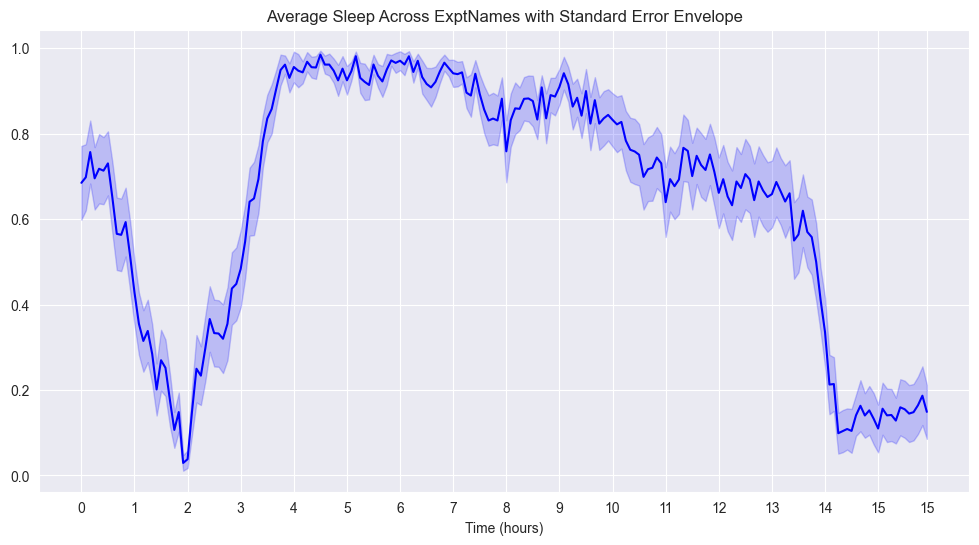

In [107]:
fig_path  = r'C:\Users\Grover\Documents\GitHub\deepsleepfigs\Fig_4_5' 
import pandas as pd
import matplotlib.pyplot as plt

# 1. Concatenate the Series into a DataFrame
concatenated_df = pd.concat(avg_bins_values, axis=1).reset_index()


sex = 'All'

if sex == 'M':
    cols_to_keep = [col for col in concatenated_df.columns if col == 'bins' or col in sex_male_extpnames]
    concatenated_df = concatenated_df[cols_to_keep]
elif sex == 'F':
    cols_to_keep = [col for col in concatenated_df.columns if col == 'bins' or col in sex_female_extpnames]
    concatenated_df = concatenated_df[cols_to_keep]
else:
    sex='All'

# Using melt to transform the data to a long format, suitable for averaging across experiments
melted_df = concatenated_df.melt(id_vars='bins', value_name='Sleep')

# 2. Group by 'bins' and calculate the mean
avg_sleep_per_bin = melted_df.groupby('bins')['Sleep'].mean()

# Calculate the standard error for each bin
standard_errors = melted_df.groupby('bins')['Sleep'].sem()

# Calculate the maximum bin value
max_bin = int(melted_df['bins'].max())

# Plotting the results with the standard error envelope
plt.figure(figsize=(12, 6))

# Plotting the average values
avg_sleep_per_bin.plot(kind='line', label='Average Sleep', color='blue')

# Filling the standard error envelope
plt.fill_between(avg_sleep_per_bin.index, 
                 avg_sleep_per_bin - standard_errors, 
                 avg_sleep_per_bin + standard_errors, 
                 color='blue', alpha=0.2)

plt.title('Average Sleep Across ExptNames with Standard Error Envelope')

# Conversion from index to hours
index_to_hour = lambda x: (x * 5) / 60  # 5 minutes per index, converted to hours

# Generate x-ticks and their labels
xticks = np.arange(0, max_bin + 1, int(60/5))  # Every 1 hour
xticks = np.append(xticks, max_bin)  # Ensure the last bin is included
xtick_labels = [str(int(index_to_hour(x))) for x in xticks]  # Convert index to hour

plt.xticks(xticks, xtick_labels)
plt.xlabel("Time (hours)")

plt.xticks(xticks, xtick_labels)
plt.xlabel("Time (hours)")

# Save the figure
plt.savefig(os.path.join(fig_path,f'avg_sleep_with_standard_error_binned_{mins}_{sex}.pdf'), dpi=300, bbox_inches='tight')

plt.show()

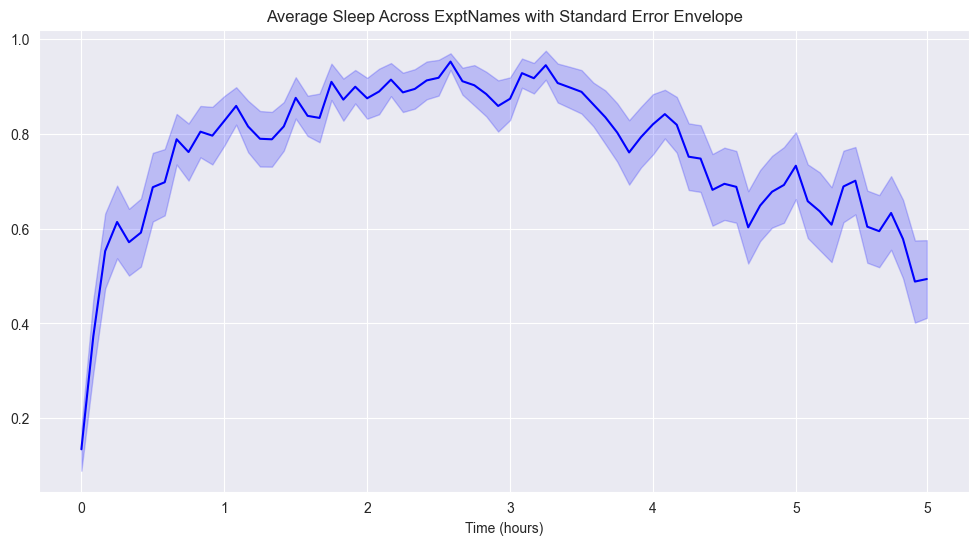

In [127]:
fig_path  = r'C:\Users\Grover\Documents\GitHub\deepsleepfigs\Fig_4_5' 
import pandas as pd
import matplotlib.pyplot as plt

# 1. Concatenate the Series into a DataFrame
concatenated_df = pd.concat(avg_bins_values_sd, axis=1).reset_index()


sex = 'All'

if sex == 'M':
    cols_to_keep = [col for col in concatenated_df.columns if col == 'bins' or col in sex_male_extpnames]
    concatenated_df = concatenated_df[cols_to_keep]
elif sex == 'F':
    cols_to_keep = [col for col in concatenated_df.columns if col == 'bins' or col in sex_female_extpnames]
    concatenated_df = concatenated_df[cols_to_keep]
else:
    sex='All'

# Using melt to transform the data to a long format, suitable for averaging across experiments
melted_df = concatenated_df.melt(id_vars='bins', value_name='Sleep')

# 2. Group by 'bins' and calculate the mean
avg_sleep_per_bin = melted_df.groupby('bins')['Sleep'].mean()

# Calculate the standard error for each bin
standard_errors = melted_df.groupby('bins')['Sleep'].sem()

# Calculate the maximum bin value
max_bin = int(melted_df['bins'].max())

# Plotting the results with the standard error envelope
plt.figure(figsize=(12, 6))

# Plotting the average values
avg_sleep_per_bin.plot(kind='line', label='Average Sleep', color='blue')

# Filling the standard error envelope
plt.fill_between(avg_sleep_per_bin.index, 
                 avg_sleep_per_bin - standard_errors, 
                 avg_sleep_per_bin + standard_errors, 
                 color='blue', alpha=0.2)

plt.title('Average Sleep Across ExptNames with Standard Error Envelope')

# Conversion from index to hours
index_to_hour = lambda x: (x * 5) / 60  # 5 minutes per index, converted to hours

# Generate x-ticks and their labels
xticks = np.arange(0, max_bin + 1, int(60/5))  # Every 1 hour
xticks = np.append(xticks, max_bin)  # Ensure the last bin is included
xtick_labels = [str(int(index_to_hour(x))) for x in xticks]  # Convert index to hour

plt.xticks(xticks, xtick_labels)
plt.xlabel("Time (hours)")

plt.xticks(xticks, xtick_labels)
plt.xlabel("Time (hours)")

# Save the figure
plt.savefig(os.path.join(fig_path,f'avg_sleep_with_standard_error_binned_SD_{mins}_{sex}.pdf'), dpi=300, bbox_inches='tight')

plt.show()

In [132]:
last_2_hour = pd.concat(avg_bins_values, axis=1).reset_index()

In [134]:
# Grab last 24 values
last_2_hour = last_2_hour.iloc[-24:]

In [152]:
first_2_hour = pd.concat(avg_bins_values_sd, axis=1).reset_index()
first_2_hour = first_2_hour.iloc[:24]

mean_sd = first_2_hour.drop(columns = 'bins').mean(axis=0)

mean_wt = last_2_hour.drop(columns = 'bins').mean(axis=0)

In [156]:
print(type(mean_wt))

<class 'pandas.core.series.Series'>


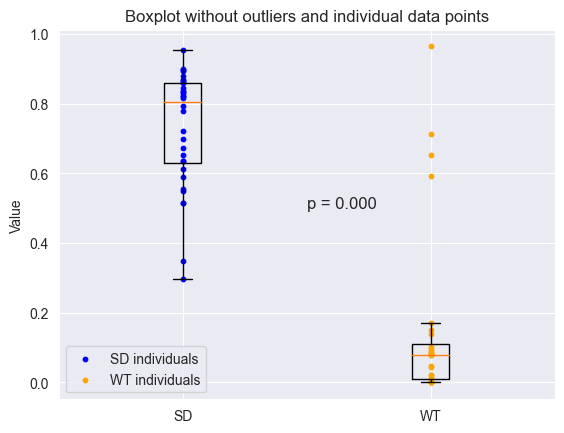

In [161]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
# Boxplot without outliers (showfliers=False)
plt.boxplot([mean_sd, mean_wt], labels=["SD", "WT"], showfliers=False)

# Overlay individual observations using scatter plot
x_coords_sd = [1] * len(mean_sd)
x_coords_wt = [2] * len(mean_wt)
plt.scatter(x_coords_sd, mean_sd, color='blue', s=10, label="SD individuals")
plt.scatter(x_coords_wt, mean_wt, color='orange', s=10, label="WT individuals")

plt.legend()
plt.title("Boxplot without outliers and individual data points")
plt.ylabel("Value")
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(mean_wt, mean_sd, alternative='two-sided')
plt.annotate(f"p = {p_value:.3f}", xy=(1.5, 0.5), xytext=(1.5, 0.5), fontsize=12)

# Save the plotted figure as a PDF
# Save the figure
plt.savefig(os.path.join(fig_path,f'Sleep_compared_ZT0-2_wt_vs_sd.pdf'), dpi=300, bbox_inches='tight')
plt.show()

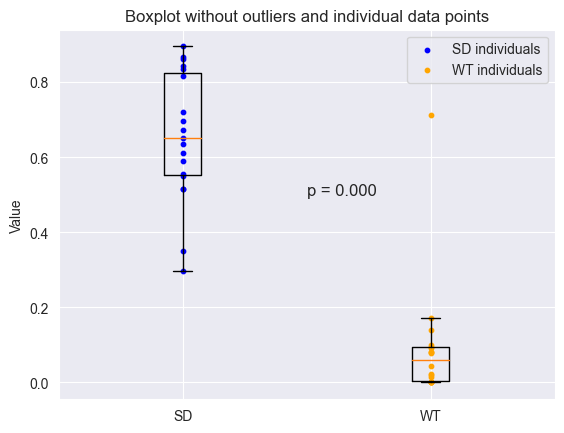

In [162]:
mean_wt_male = mean_wt[mean_wt.index.isin(sex_male_extpnames)]
mean_sd_male = mean_sd[mean_sd.index.isin(sex_male_extpnames)]

import matplotlib.pyplot as plt

# Boxplot without outliers (showfliers=False)
plt.boxplot([mean_sd_male, mean_wt_male], labels=["SD", "WT"], showfliers=False)

# Overlay individual observations using scatter plot
x_coords_sd = [1] * len(mean_sd_male)
x_coords_wt = [2] * len(mean_wt_male)
plt.scatter(x_coords_sd, mean_sd_male, color='blue', s=10, label="SD individuals")
plt.scatter(x_coords_wt, mean_wt_male, color='orange', s=10, label="WT individuals")

plt.legend()
plt.title("Boxplot without outliers and individual data points")
plt.ylabel("Value")

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(mean_wt_male, mean_sd_male, alternative='two-sided')
plt.annotate(f"p = {p_value:.3f}", xy=(1.5, 0.5), xytext=(1.5, 0.5), fontsize=12)

# Save the plotted figure as a PDF
# Save the figure
plt.savefig(os.path.join(fig_path,f'Sleep_compared_ZT0-2_wt_vs_sd_male.pdf'), dpi=300, bbox_inches='tight')
plt.show()

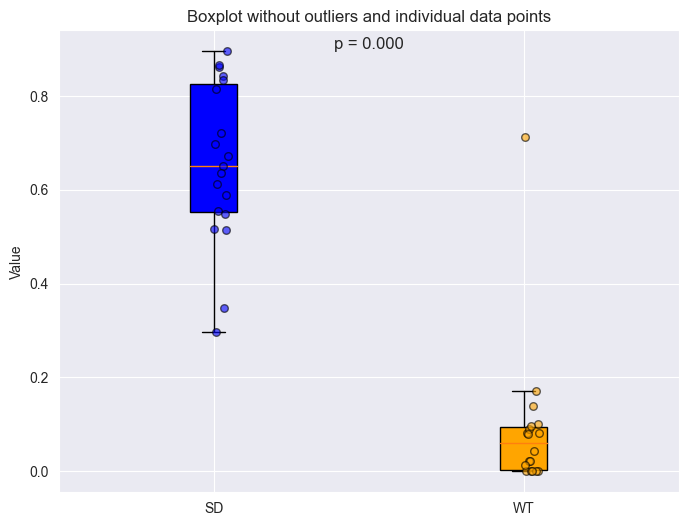

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Calculate the p-value (you've already done this in the provided code)
statistic, p_value = mannwhitneyu(mean_wt_male, mean_sd_male, alternative='two-sided')

# Create a boxplot without outliers
fig, ax = plt.subplots(figsize=(8, 6))
boxplots = ax.boxplot([mean_sd_male, mean_wt_male], labels=["SD", "WT"], showfliers=False, patch_artist=True)

# Assign colors to the boxes
colors = ['blue', 'orange']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Add jitter and overlay individual data points on the boxplot
def jitter_points(mean_values, position, color, label, width=0.05):
    jitter = width * np.random.rand(len(mean_values)) + position
    ax.scatter(jitter, mean_values, color=color, s=30, edgecolor='black', zorder=5, alpha=0.6, label=label)

# Jitter points for SD and WT
jitter_points(mean_sd_male, 1, 'blue', "SD individuals")
jitter_points(mean_wt_male, 2, 'orange', "WT individuals")

# Annotate with the p-value
ax.annotate(f"p = {p_value:.3f}", (1.5, 0.9), ha='center', fontsize=12)

# Add title and y-label
ax.set_title("Boxplot without outliers and individual data points")
ax.set_ylabel("Value")

# Save the plotted figure as a PDF
# (adjust path as needed)
plt.savefig(os.path.join(fig_path, 'Sleep_compared_ZT0-2_wt_vs_sd_male.pdf'), dpi=300, bbox_inches='tight')

plt.show()

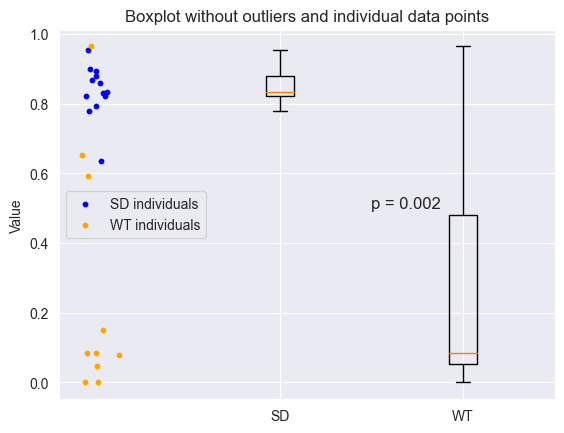

In [179]:
mean_wt_female = mean_wt[mean_wt.index.isin(sex_female_extpnames)]
mean_sd_female = mean_sd[mean_sd.index.isin(sex_female_extpnames)]

import matplotlib.pyplot as plt

# Boxplot without outliers (showfliers=False)
plt.boxplot([mean_sd_female, mean_wt_female], labels=["SD", "WT"], showfliers=False)

# Overlay individual observations using scatter plot
x_coords_sd = 0.05 * np.random.randn(len(mean_sd_female))  # Adding random noise
x_coords_wt = 0.05 * np.random.randn(len(mean_wt_female))
plt.scatter(x_coords_sd, mean_sd_female, color='blue', s=10, label="SD individuals")
plt.scatter(x_coords_wt, mean_wt_female, color='orange', s=10, label="WT individuals")

statistic, p_value = mannwhitneyu(mean_wt_female, mean_sd_female, alternative='two-sided')
plt.annotate(f"p = {p_value:.3f}", xy=(1.5, 0.5), xytext=(1.5, 0.5), fontsize=12)

plt.legend()
plt.title("Boxplot without outliers and individual data points")
plt.ylabel("Value")

# Save the plotted figure as a PDF
# Save the figure
plt.savefig(os.path.join(fig_path,f'Sleep_compared_ZT0-2_wt_vs_sd_female.pdf'), dpi=300, bbox_inches='tight')
plt.show()

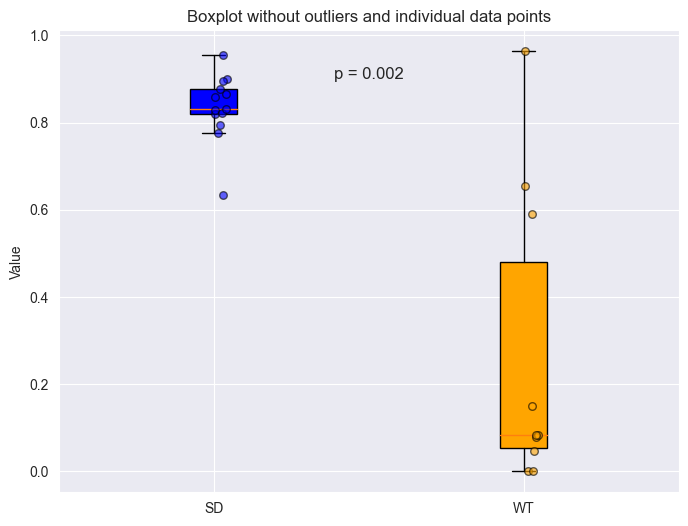

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


mean_wt_female = mean_wt[mean_wt.index.isin(sex_female_extpnames)]
mean_sd_female = mean_sd[mean_sd.index.isin(sex_female_extpnames)]


# Calculate the p-value (you've already done this in the provided code)
statistic, p_value = mannwhitneyu(mean_wt_female, mean_sd_female, alternative='two-sided')

# Create a boxplot without outliers
fig, ax = plt.subplots(figsize=(8, 6))
boxplots = ax.boxplot([mean_sd_female, mean_wt_female], labels=["SD", "WT"], showfliers=False, patch_artist=True)

# Assign colors to the boxes
colors = ['blue', 'orange']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Add jitter and overlay individual data points on the boxplot
def jitter_points(mean_values, position, color, label, width=0.05):
    jitter = width * np.random.rand(len(mean_values)) + position
    ax.scatter(jitter, mean_values, color=color, s=30, edgecolor='black', zorder=5, alpha=0.6, label=label)

# Jitter points for SD and WT
jitter_points(mean_sd_female, 1, 'blue', "SD individuals")
jitter_points(mean_wt_female, 2, 'orange', "WT individuals")

# Annotate with the p-value
ax.annotate(f"p = {p_value:.3f}", (1.5, 0.9), ha='center', fontsize=12)

# Add title and y-label
ax.set_title("Boxplot without outliers and individual data points")
ax.set_ylabel("Value")

# Save the plotted figure as a PDF
# (adjust path as needed)
plt.savefig(os.path.join(fig_path, 'Sleep_compared_ZT0-2_wt_vs_sd_female.pdf'), dpi=300, bbox_inches='tight')

plt.show()

In [165]:
df_wt

,ExptName,start_index,stop_index,bout_length
0,Fly05182022_5d,0,74627,74627
5,Fly05182022_5d,103594,105777,2183
9,Fly05182022_5d,116042,119207,3165
15,Fly05182022_5d,191614,194011,2397
18,Fly05182022_5d,236411,243835,7424
...,...,...,...,...
7405,Fly08032022_6d_B,1407038,1447846,40808
7409,Fly08032022_6d_B,1450172,1468531,18359
7411,Fly08032022_6d_B,1469277,1506431,37154
7414,Fly08032022_6d_B,1510215,1512922,2707


In [ ]:
mins = 30

bin_value = mins*30*60

max_bin_sd = 6*30*60*60
max_bin_wt = 16*30*60*60


# Function to add a 'bins' column based on the 'Sleep' column
def add_bins_column(df, bin_value,sd):
    
    if sd:
        max_bin = max_bin_sd
    else:
        max_bin = max_bin_wt
    # Create bin edges based on the length of the dataframe and the bin_value
    bin_edges = np.linspace(0, max_bin, max_bin // bin_value + 1)
    
    # Use pd.cut to create the 'bins' column
    df['bins'] = pd.cut(df['start_index'], bins=bin_edges, labels=False, include_lowest=True)

    return df




In [219]:

# Define your parameters
mins = 30
bin_value = mins * 30 * 60
max_bin_sd = 6 * 30 * 60 * 60
max_bin_wt = 16 * 30 * 60 * 60

# Define your function
def add_bins_column(df, bin_value, sd):
    
    if sd:
        max_bin = max_bin_sd
    else:
        max_bin = max_bin_wt
    bin_edges = np.linspace(0, max_bin, max_bin // bin_value + 1)
    df['bins'] = pd.cut(df['start_index'], bins=bin_edges, labels=False, include_lowest=True)

    return df

# Assuming that 'sd' is determined by whether 'SD' is in the ExptName
# Modify as needed
def determine_sd(ExptName):
    return 'SD' in ExptName

# Apply the function to each group
bout_binned_wt = df_wt.groupby('ExptName').apply(lambda group: add_bins_column(group, bin_value, determine_sd(group['ExptName'].iloc[0])))

bout_binned_sd = df_sd.groupby('ExptName').apply(lambda group: add_bins_column(group, bin_value, determine_sd(group['ExptName'].iloc[0])))

In [242]:
bout_binned_wt['bout_length_min'] = bout_binned_wt['bout_length']/(30*60)
bout_binned_sd['bout_length_min'] = bout_binned_sd['bout_length']/(30*60)

,ExptName,start_index,stop_index,bout_length,bins
475,Fly05272022_SD_5d,1091,3215,2124,0
477,Fly05272022_SD_5d,9071,33092,24021,0
478,Fly05272022_SD_5d,43812,58946,15134,0
479,Fly05272022_SD_5d,59064,63872,4808,1
487,Fly05272022_SD_5d,71691,87001,15310,1
...,...,...,...,...,...
7480,Fly08032022_6d_SD_B,449847,451934,2087,8
7492,Fly08032022_6d_SD_B,509096,515787,6691,9
7494,Fly08032022_6d_SD_B,527867,531646,3779,9
7499,Fly08032022_6d_SD_B,565065,568148,3083,10


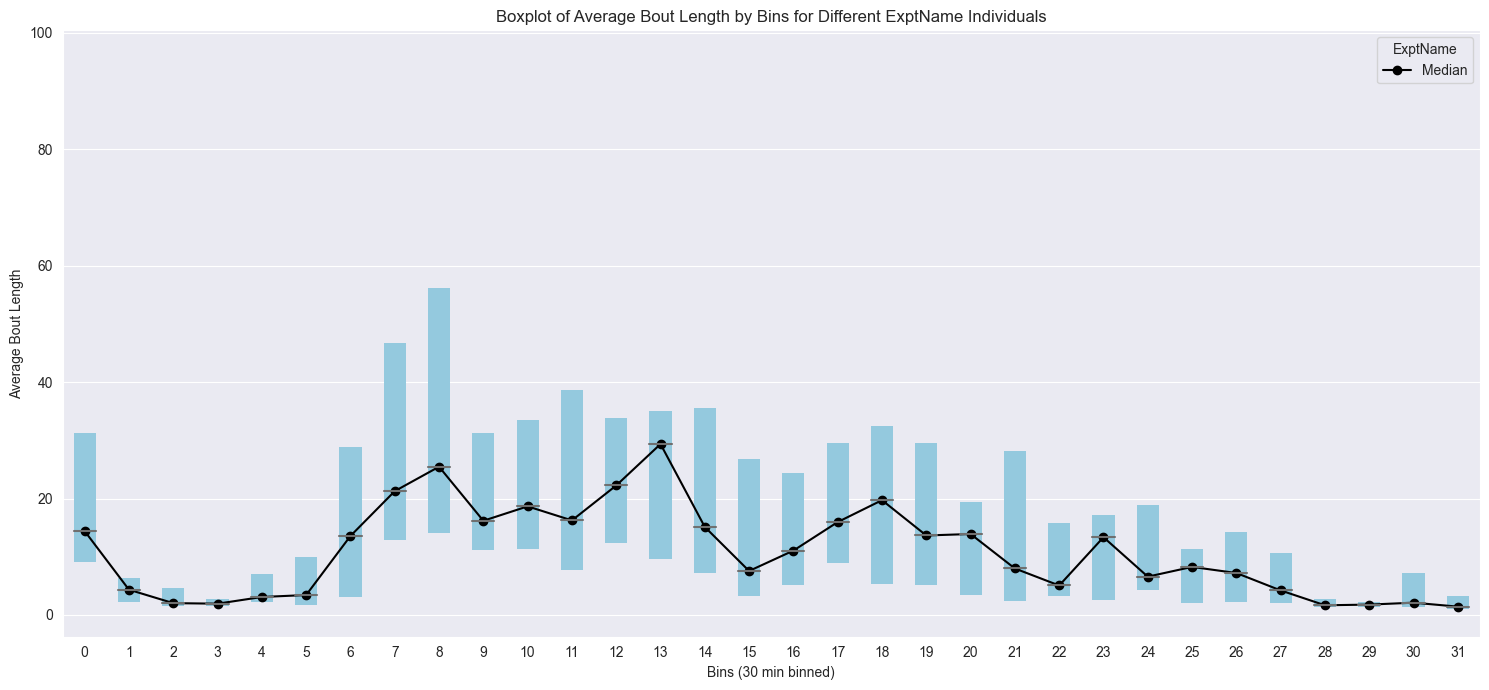

In [236]:
avg_bout_length_wt = bout_binned_wt.groupby(['ExptName', 'bins'])['bout_length_min'].mean().reset_index()#
sex_male_extpnames = [name for name, value in name_to_sex.items() if value == 'M']
sex_female_extpnames = [name for name, value in name_to_sex.items() if value == 'F']
sex = 'All'
if sex == 'M':
    avg_bout_length_wt = avg_bout_length_wt[avg_bout_length_wt['ExptName'].isin(sex_male_extpnames)]
elif sex == 'F':
    avg_bout_length_wt = avg_bout_length_wt[avg_bout_length_wt['ExptName'].isin(sex_female_extpnames)]
else:
    sex='All'

plt.figure(figsize=(15, 7))

# Use seaborn to create the boxplot
sns.boxplot(data=avg_bout_length_wt, x='bins', y='bout_length_min',showfliers=False, color="skyblue",width=0.5, notch=False, boxprops=dict(edgecolor='none'),showcaps=False, whiskerprops={'visible': False})

# Calculate the median values for each time bin
medians = avg_bout_length_wt.groupby('bins')['bout_length_min'].median().reset_index()
    
# Plot the medians using the mid_points for the x-axis
plt.plot(range(len(medians)), medians['bout_length_min'], color='black', linestyle='-', marker='o', label="Median")

plt.xlabel('Bins (30 min binned)')
plt.ylabel('Average Bout Length')
plt.title('Boxplot of Average Bout Length by Bins for Different ExptName Individuals')
plt.legend(title='ExptName')
plt.tight_layout()
# Save figures
plt.savefig(os.path.join(fig_path, f'Sleep_bouts_wt_{sex}.pdf'), dpi=300, bbox_inches='tight')
plt.show()


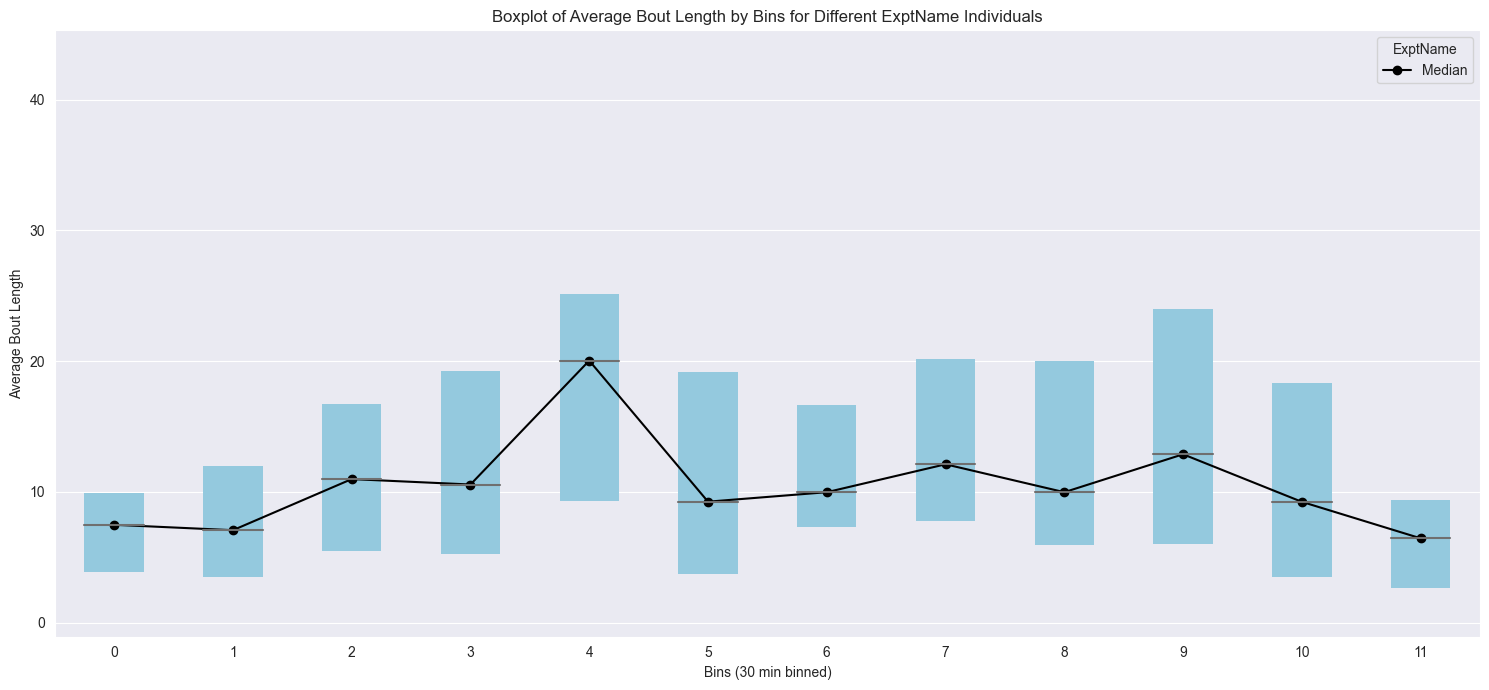

In [251]:
import seaborn as sns

avg_bout_length_sd = bout_binned_sd.groupby(['ExptName', 'bins'])['bout_length_min'].mean().reset_index()

#
sex_male_extpnames = [name for name, value in name_to_sex.items() if value == 'M']
sex_female_extpnames = [name for name, value in name_to_sex.items() if value == 'F']
sex = 'All'
if sex == 'M':
    avg_bout_length_sd = avg_bout_length_sd[avg_bout_length_sd['ExptName'].isin(sex_male_extpnames)]
elif sex == 'F':
    avg_bout_length_sd = avg_bout_length_sd[avg_bout_length_sd['ExptName'].isin(sex_female_extpnames)]
else:
    sex='All'

plt.figure(figsize=(15, 7))

# Use seaborn to create the boxplot
sns.boxplot(data=avg_bout_length_sd, x='bins', y='bout_length_min',showfliers=False, color="skyblue",width=0.5, notch=False, boxprops=dict(edgecolor='none'),showcaps=False, whiskerprops={'visible': False})

# Calculate the median values for each time bin
medians = avg_bout_length_sd.groupby('bins')['bout_length_min'].median().reset_index()
    
# Plot the medians using the mid_points for the x-axis
plt.plot(range(len(medians)), medians['bout_length_min'], color='black', linestyle='-', marker='o', label="Median")

plt.xlabel('Bins (30 min binned)')
plt.ylabel('Average Bout Length')
plt.title('Boxplot of Average Bout Length by Bins for Different ExptName Individuals')
plt.legend(title='ExptName')
plt.tight_layout()
# Save figures
plt.savefig(os.path.join(fig_path, f'Sleep_bouts_wt_{sex}_.SD_.pdf'), dpi=300, bbox_inches='tight')
plt.show()

In [247]:
avg_bout_length_sd.unie

,ExptName,bins,bout_length_min
0,Fly05272022_SD_5d,0,7.644259
1,Fly05272022_SD_5d,1,5.131111
2,Fly05272022_SD_5d,2,3.285972
3,Fly05272022_SD_5d,3,46.827778
4,Fly05272022_SD_5d,4,10.182778
...,...,...,...
300,Fly08032022_6d_SD_B,6,8.095556
301,Fly08032022_6d_SD_B,7,5.877037
302,Fly08032022_6d_SD_B,8,2.320556
303,Fly08032022_6d_SD_B,9,2.908333
